In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

In [17]:
# Load the AAL stock data
df = pd.read_csv('Data/StockData.csv')

# Data cleaning
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop(columns=['open', 'high', 'low', 'volume', 'Name'], inplace=True)
df.rename(columns={'close': 'Close'}, inplace=True)
df.dropna(inplace=True)

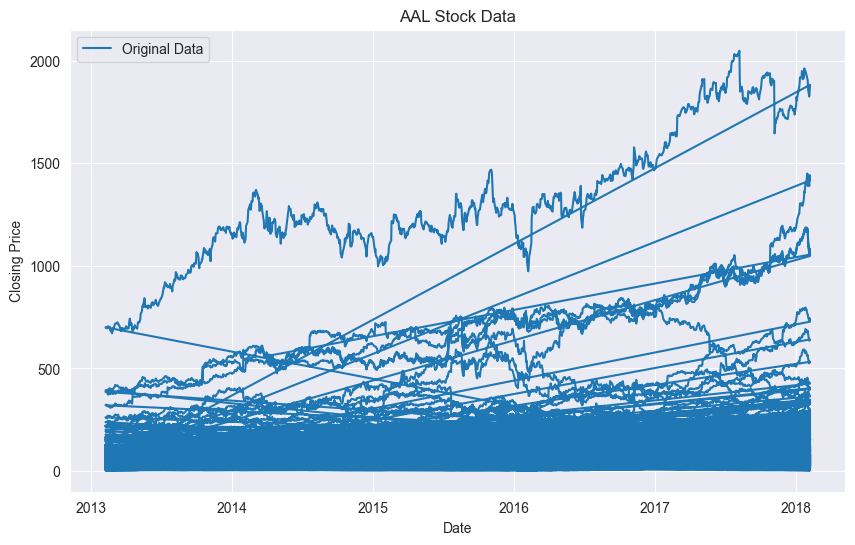

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Original Data')
plt.title('AAL Stock Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

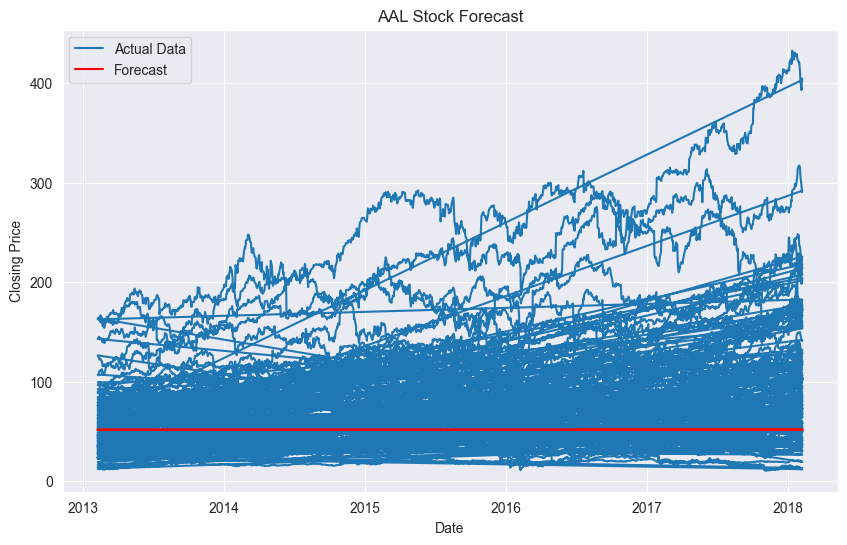

In [23]:
# Standardization
scaler = StandardScaler()
df['Close_Standardized'] = scaler.fit_transform(df[['Close']])

# ARIMA modeling
# Splitting data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['Close_Standardized'], order=(5,1,0))
model_fit = model.fit()

# Forecast
n_periods = len(test)
forecast = model_fit.forecast(steps=n_periods)

# Inverse transform forecasted values to get original scale
forecast_unscaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Plotting forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Actual Data')
plt.plot(test.index, forecast_unscaled, color='red', label='Forecast')
plt.title('AAL Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

KeyError: 'date'